In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# plot title 한글 패치
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

In [3]:
df_category = pd.read_csv('./업종별 월별 결제 금액 소비패턴 현황.csv', parse_dates=["년월"])

In [4]:
df_category.shape

(113498, 6)

In [5]:
df_category.head()

,년월,시도명,시군구명,동명,가맹점업종명,총결제금액
0,2019-03-01,경기도,가평군,가평읍,가구,0
1,2019-03-01,경기도,가평군,가평읍,건강식품,0
2,2019-03-01,경기도,가평군,가평읍,건축자재,0
3,2019-03-01,경기도,가평군,가평읍,광학제품,0
4,2019-03-01,경기도,가평군,가평읍,기타,0


In [6]:
df_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113498 entries, 0 to 113497
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   년월      113498 non-null  datetime64[ns]
 1   시도명     113498 non-null  object        
 2   시군구명    113498 non-null  object        
 3   동명      113498 non-null  object        
 4   가맹점업종명  113498 non-null  object        
 5   총결제금액   113498 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 5.2+ MB


In [7]:
pd.set_option('float_format', '{:.2f}'.format)
df_category.describe()

,총결제금액
count,113498.00
mean,587396.26
std,5001269.64
min,0.00
25%,0.00
50%,0.00
75%,4500.00
max,324965340.00


In [9]:
# 결측치 확인
df_category.isnull().sum()

년월        0
시도명       0
시군구명      0
동명        0
가맹점업종명    0
총결제금액     0
dtype: int64

In [10]:
df_category['시군구명'].unique()

array(['가평군', '고양시 덕양구', '고양시 일산동구', '고양시 일산서구', '과천시', '광명시', '광주시',
       '구리시', '군포시', '김포시', '남양주시', '동두천시', '부천시', '성남시 분당구', '성남시 수정구',
       '성남시 중원구', '수원시 권선구', '수원시 영통구', '수원시 장안구', '수원시 팔달구', '시흥시',
       '안산시 단원구', '안산시 상록구', '안성시', '안양시 동안구', '안양시 만안구', '양주시', '양평군',
       '여주시', '연천군', '오산시', '용인시 기흥구', '용인시 수지구', '용인시 처인구', '의왕시',
       '의정부시', '이천시', '파주시', '평택시', '포천시', '하남시', '화성시'], dtype=object)

In [11]:
#경기 행정구역 - 시 : 28 / 군 : 3 (31) 
s_split = df_category['시군구명'].str.split(" ", expand=True)
len(s_split[0].unique())

31

## 데이터 전처리
* 년월 컬럼 사용하기 위해 전처리
* 시군구명 컬럼에서 고양시, 수원시, 용인시, 성남시, 안산시는 구별로 나눠져 있음  
  구별로 나누지 않고 보기 위해 행정구역 컬럼 추가

In [12]:
df_category["year"] = df_category["년월"].dt.year
df_category["month"] = df_category["년월"].dt.month
df_category['year_month'] = df_category["년월"].dt.strftime("%Y-%m")
df_category['행정구역'] = s_split[0]

In [14]:
df_category.head()

,년월,시도명,시군구명,동명,가맹점업종명,총결제금액,year,month,year_month,행정구역
0,2019-03-01,경기도,가평군,가평읍,가구,0,2019,3,2019-03,가평군
1,2019-03-01,경기도,가평군,가평읍,건강식품,0,2019,3,2019-03,가평군
2,2019-03-01,경기도,가평군,가평읍,건축자재,0,2019,3,2019-03,가평군
3,2019-03-01,경기도,가평군,가평읍,광학제품,0,2019,3,2019-03,가평군
4,2019-03-01,경기도,가평군,가평읍,기타,0,2019,3,2019-03,가평군


## 데이터 탐색

<AxesSubplot:xlabel='총결제금액', ylabel='가맹점업종명'>

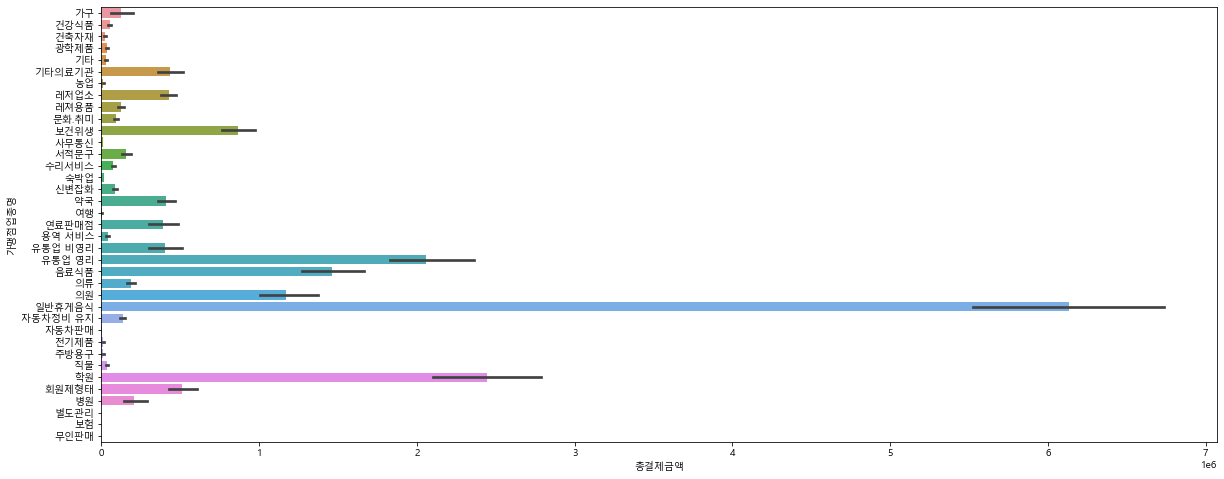

In [29]:
#월별 결제금액 추이
figure, ax1 = plt.subplots(nrows=1, ncols=1)

figure.set_size_inches(20, 8)

sns.barplot(data=df_category, x='총결제금액', y='가맹점업종명' ,ax=ax1, orient='h')

In [20]:
month_s = df_category.groupby('가맹점업종명')
month_s['총결제금액'].sum().sort_values(ascending=False)

가맹점업종명
일반휴게음식      24340284777
학원           9090577283
유통업 영리       8004311100
음료식품         5792116980
의원           3371838890
보건위생         3177361148
회원제형태        1851020744
레저업소         1569882504
연료판매점        1323370602
약국           1245168836
기타의료기관       1188902793
유통업 비영리      1001491538
의류            660694798
서적문구          544030975
자동차정비 유지      498971961
레져용품          433677977
가구            404557183
병원            359241479
문화.취미         353809839
신변잡화          310846396
수리서비스         258293911
건강식품          162271435
용역 서비스        154182229
직물            121711224
기타             99147309
광학제품           89331444
건축자재           82130139
전기제품           39367045
숙박업            39200910
주방용구           34964790
사무통신           30551728
농업             27652852
자동차판매           5615604
여행              1722700
별도관리                  0
보험                    0
무인판매                  0
Name: 총결제금액, dtype: int64

## 데이터 추출

In [31]:
df_category.to_csv('경기도_업종별_소비.csv', index = False)